In [22]:
# import dependencies
import pandas as pd
%matplotlib inline
import seaborn as sns

In [23]:
# import files
discont_chem = pd.read_csv(r'Unique_Chem.csv', usecols=['ChemicalName'])
discont_chem_df = pd.read_csv('ulta_toxic_chemicals_data.csv', 
                   usecols= ['brand', 'description', 'rating (0.0)', 'ingredients list', 
                            'number_of_reviews', 'price_USD', 'number_of_ingredients','sum of toxic ingredients'])

# ulta_df.to_csv('ulta_toxic_chemicals_data.csv', index=False)

In [24]:
# create columns for ingredients in discontinued products
for chem in discont_chem['ChemicalName']:
    discont_chem_df[chem] = 0

In [25]:
# loop through each products ingredients list to see if the toxic chemicals are included 
for chem in discont_chem['ChemicalName']: 
    for i in range(0, len(discont_chem_df)-1):
        if chem in discont_chem_df['ingredients list'][i]: 
            discont_chem_df[chem][i] = 1
        else:
            continue

C:\Users\Trisarah\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
discont_chem_df

brand                                        description  number_of_ingredients  number_of_reviews  price_USD                                   ingredients list  rating (0.0)  sum of toxic ingredients  1,4-Dioxane  2,2-Bis(bromomethyl)-1,3-propanediol  2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)  2-Propyleneacrolein  Acetaldehyde  Acetic acid, retinyl ester  Acetylsalicylic acid  Acrylamide  All-trans retinoic acid  Aloe vera, non-decolorized whole leaf extract  Aloe vera, whole leaf extract  Arsenic (inorganic arsenic compounds)  Arsenic (inorganic oxides)  Aspirin  Avobenzone  Benz(a)anthracene  Benzene  Benzo(a)pyrene  Benzophenone  Benzophenone-2  Benzophenone-3  Benzophenone-4  Benzyl chloride  Butylated hydroxyanisole  C.I. Acid Red 114  Cadmium and cadmium compounds  Caffeic acid  Caffeine  Carbon black  Carbon-black extracts  Chromium (hexavalent compounds)  Coal Tar  Coal tar extract  Coal tar solution  Coal tars  Cocamide  \
0             Philosophy        purity-made-simple-one-step-facial-cleanser                     29               3881         36  'Water', 'Sodium Lauroamphoacetate', 'Sodium T...            46                         1            0                                     0                                                  0                                  0             0                           0                     0           0                        0                                              0                              0                                      0                           0        0           0                  0        0               0             0               0               0               0                0                         0                  0                              0             0         0             0                      0                                0         0                 0                  0          0         0   
1            Dermalogica                              special-cleansing-gel                     16               2202         39  'Water/Aqua/Eau', 'Sodium Laureth Sulfate', 'D...            46                         2            0                                     0                                                  0                                  0             0                           0                     0           0                        0                                              0                              0                                      0                           0        0           0                  0        0               0             0               0               0               0                0                         0                  0                              0             0         0             0                      0                                0         0                 0                  0          0         0   
2               Clinique                        take-day-off-cleansing-balm                      9               1793         30  'Ethylhexyl Palmitate', 'Carthamus Tinctorius ...            47                         0            0                                     0                                                  0                                  0             0                           0                     0           0                        0                                              0                              0                                      0                           0        0           0                  0        0               0             0               0               0               0                0                         0                  0                              0             0         0             0                      0                                0         0                 0                  0          0         0   
3               Clinique                            liquid-facial-s

In [28]:
# create list of the string coloumns from the ulta df
ulta_string_col = ['brand','description','number_of_ingredients','number_of_reviews',
                   'price_USD','ingredients list', 'rating (0.0)', 'sum of toxic ingredients']

# drop the string columns
ulta_no_string_df = discont_chem_df.drop(columns=ulta_string_col)

In [29]:
# make the integer columns a list
ingredients_col_names = ulta_no_string_df.columns.tolist()

In [34]:
# save sum of rows(axis=1) in new column on ulta df
discont_chem_df['sum of discont ing'] = discont_chem_df[ingredients_col_names].sum(axis=1)
# ulta_df = ulta_df.drop(columns='sum')
discont_chem_df

brand                                        description  number_of_ingredients  number_of_reviews  price_USD                                   ingredients list  rating (0.0)  sum of toxic ingredients  1,4-Dioxane  2,2-Bis(bromomethyl)-1,3-propanediol  2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)  2-Propyleneacrolein  Acetaldehyde  Acetic acid, retinyl ester  Acetylsalicylic acid  Acrylamide  All-trans retinoic acid  Aloe vera, non-decolorized whole leaf extract  Aloe vera, whole leaf extract  Arsenic (inorganic arsenic compounds)  Arsenic (inorganic oxides)  Aspirin  Avobenzone  Benz(a)anthracene  Benzene  Benzo(a)pyrene  Benzophenone  Benzophenone-2  Benzophenone-3  Benzophenone-4  Benzyl chloride  Butylated hydroxyanisole  C.I. Acid Red 114  Cadmium and cadmium compounds  Caffeic acid  Caffeine  Carbon black  Carbon-black extracts  Chromium (hexavalent compounds)  Coal Tar  Coal tar extract  Coal tar solution  Coal tars  Cocamide  \
0             Philosophy        purity-made-simple-one-step-facial-cleanser                     29               3881         36  'Water', 'Sodium Lauroamphoacetate', 'Sodium T...            46                         1            0                                     0                                                  0                                  0             0                           0                     0           0                        0                                              0                              0                                      0                           0        0           0                  0        0               0             0               0               0               0                0                         0                  0                              0             0         0             0                      0                                0         0                 0                  0          0         0   
1            Dermalogica                              special-cleansing-gel                     16               2202         39  'Water/Aqua/Eau', 'Sodium Laureth Sulfate', 'D...            46                         2            0                                     0                                                  0                                  0             0                           0                     0           0                        0                                              0                              0                                      0                           0        0           0                  0        0               0             0               0               0               0                0                         0                  0                              0             0         0             0                      0                                0         0                 0                  0          0         0   
2               Clinique                        take-day-off-cleansing-balm                      9               1793         30  'Ethylhexyl Palmitate', 'Carthamus Tinctorius ...            47                         0            0                                     0                                                  0                                  0             0                           0                     0           0                        0                                              0                              0                                      0                           0        0           0                  0        0               0             0               0               0               0                0                         0                  0                              0             0         0             0                      0                                0         0                 0                  0          0         0   
3               Clinique                            liquid-facial-s

In [55]:
discont_chem['ChemicalName']

test = discont_chem_df.drop(columns=discont_chem['ChemicalName'])
test

brand                                        description  number_of_ingredients  number_of_reviews  price_USD                                   ingredients list  rating (0.0)  sum of toxic ingredients  sum of dis cont ing  sum of discont ing
0             Philosophy        purity-made-simple-one-step-facial-cleanser                     29               3881         36  'Water', 'Sodium Lauroamphoacetate', 'Sodium T...            46                         1                    1                   1
1            Dermalogica                              special-cleansing-gel                     16               2202         39  'Water/Aqua/Eau', 'Sodium Laureth Sulfate', 'D...            46                         2                    0                   0
2               Clinique                        take-day-off-cleansing-balm                      9               1793         30  'Ethylhexyl Palmitate', 'Carthamus Tinctorius ...            47                         0                    0                   0
3               Clinique                            liquid-facial-soap-mild                     23                601         18  'Water / Aqua / Eau', 'Sodium Laureth Sulfate'...            45                         1                    0                   0
4             Philosophy              microdelivery-exfoliating-facial-wash                     31                672         28  'Aqua/Water/Eau', 'Solum Diatomeae/Diatomaceou...            40                         0                    0                   0
5           It Cosmetics                           confidence-in-a-cleanser                     69                467         28  'Aqua/Water/Eau', 'Disodium Cocoamphodiacetate...            45                         1                    1                   1
6            Dermalogica                                 clearing-skin-wash                     37                910         39  'Salicylic Acid (0.5%)', 'Water (Aqua)', 'Sodi...            45                         0                    0                   0
7                   Tula                            purifying-face-cleanser                     43                225         28  'Aqua/Water/Eau', 'Cocamidopropyl Betaine', 'P...            43                         0                    0                   0
8               Clinique                      acne-solutions-cleansing-foam                     31               1006         22  'Active: 2.0% Salicylic Acid. Inactive: Water ...            46                         0                    1                   1
9            Dermalogica                              ultracalming-cleanser                     29                182         39  'Water/Aqua/Eau', 'Cetearyl Alcohol', 'Bisabol...             0                         0                    0                   0
10          The Ordinary                                  squalane-cleanser                     20                 50          7  'Squalane', 'Aqua (Water)', 'Coco-Caprylate/Ca...            48                         0                    0                   0
11                 Murad                        ahabha-exfoliating-cleanser                     21                223         40  'Water (Aqua)', 'Sodium Laureth Sulfate', 'Coc...            47                         2                    0                   0
12                 Murad                                clarifying-cleanser                     31                744         30  'Active Ingredient: Salicylic Acid (1.51%). Ot...            47                         0                    0                   0
13                CeraVe          hydrating-facial-cleanser-normal-dry-skin                     22                460         14  'Purified Water', 'Glycerin', 'Behentrimonium ...            48                         1                    0                   0
14      First Aid Beauty                                      face-cleanser                     27      

In [56]:
test = test.corr()

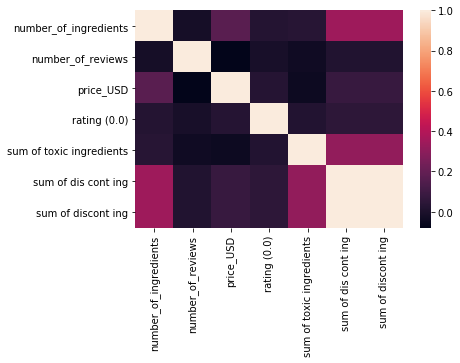

In [57]:
sns.heatmap(test)

In [44]:
testing_list = ['brand','description','ingredients list']
testing_df = discont_chem_df.drop(columns=testing_list)
testing_df = testing_df.corr()

In [52]:
testing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, number_of_ingredients to sum of discont ing
Data columns (total 128 columns):
number_of_ingredients                                                                                  float64
number_of_reviews                                                                                      float64
price_USD                                                                                              float64
rating (0.0)                                                                                           float64
sum of toxic ingredients                                                                               float64
1,4-Dioxane                                                                                            float64
2,2-Bis(bromomethyl)-1,3-propanediol                                                                   float64
2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)                        

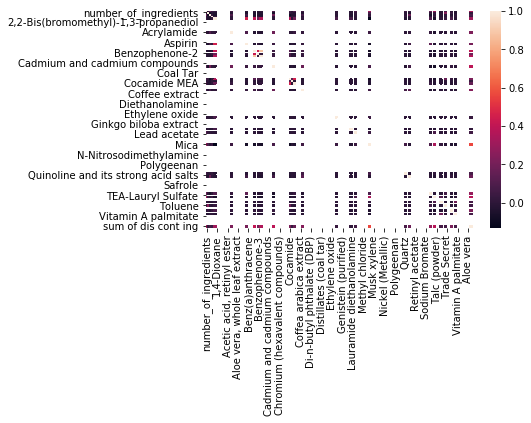

In [45]:
sns.heatmap(testing_df)